# AI Based Evaluate the competency of the Institution:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
data = pd.read_csv("ETA_Data.csv")
data.tail()

,Serial_No,Institution_name,Field_of_study,Education_Level,Academic_Discipline,Program,Date_Of_License,End_Of_License_Date,Survival_Period,License_Status,Campus_Location,Region,Addmission_Of_New_Entry,Intake_Capacity,Institute_website
4116,349,Green land College,Business Administration,MA Degree,Social Science,Regular,05-01-23,05-01-26,3,Active,Jimma,Oromia,Allowed,45.0,No
4117,350,Hidase Medical Science and Business College,Management,BA Degree,Social Science,Regular,04-01-23,03-01-27,4,Active,Gilgel Beles,Benishangul-Gumuz,Allowed,45.0,No
4118,350,Hidase Medical Science and Business College,Nursing,BSc Degree,Natural Science,Regular,04-01-23,03-01-27,4,Active,Gilgel Beles,Benishangul-Gumuz,Allowed,40.0,No
4119,351,Hiwet AmbaCollege,Nursing,BSc Degree,Natural Science,Regular,07-01-23,03-01-27,4,Active,Addis Zemen,Amhara,Allowed,40.0,No
4120,351,Hiwet AmbaCollege,Management,BA Degree,Social Science,Regular,07-01-23,03-01-27,4,Active,Addis Zemen,Amhara,Allowed,NaN,NaN


### Imputation of Missing Values:

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("ETA_Data.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Impute missing values in 'Intake_Capacity' with the mean
mean_intake_capacity = data['Intake_Capacity'].mean()
data['Intake_Capacity'].fillna(mean_intake_capacity, inplace=True)

Missing Values:
Serial_No                     0
Institution_name              0
Field_of_study                0
Education_Level               0
Academic_Discipline           0
Program                       0
Date_Of_License               1
End_Of_License_Date          14
Survival_Period               0
License_Status                0
Campus_Location               0
Region                        0
Addmission_Of_New_Entry       1
Intake_Capacity            3985
Institute_website            15
dtype: int64


### The reputation rankings, considering the survival period of institutions. With this context, here's the revised description of the reputation rankings:

1. **5: Excellent (Survival Period > 21 years)**: Institutions with a reputation ranking of 5 are considered excellent. They have demonstrated exceptional longevity, with a survival period of more than 21 years. These institutions have a strong, enduring reputation and a track record of consistent excellence in education and research.

2. **4: Very Good (Survival Period 16-20 years)**: Reputation ranking 4 represents institutions that are very good. They have maintained a solid presence in the academic world, with a survival period of 16 to 20 years. These institutions are well-established and have a reputation for quality education and research.

3. **3: Good (Survival Period 11-16 years)**: A reputation ranking of 3 signifies that institutions are good. They have a respectable track record, having survived in the academic landscape for 11 to 16 years. These institutions are known for their positive contributions to education and research.

4. **2: Fair (Survival Period 6-10 years)**: Institutions with a ranking of 2 are considered fair. They have been in existence for 6 to 10 years and are working to establish a more substantial reputation. While they have made progress, they may still face certain challenges and are in the process of gaining recognition.

5. **1: Satisfactory (Survival Period 1-5 years)**: Reputation ranking 1 indicates institutions that are satisfactory. These institutions have a relatively short survival period of 1 to 5 years and are in the early stages of their development. They have potential but are still building their reputation.

6. **0: Inactive (Otherwise)**: A reputation ranking of 0 represents institutions that are inactive or don't fall within the specified survival periods. These institutions may have ceased operations, or their status as an active educational institution is unclear. This ranking suggests a lack of current or recognized activity in the education sector.

The integration of the survival period into the reputation rankings provides a comprehensive assessment of institutions, taking into account their history and longevity in addition to their reputation. This context offers valuable insights for prospective students and stakeholders in the education sector.

# 1. Feature engineering :
involves creating new features from existing data to improve the performance of machine learning models.to perform feature engineering based on the provided data to evaluate the competency of institutions, considering their field of study and other relevant factors. Here's a step-by-step guide with source code in Python:

The provided code is an example of how you can create a new feature called "Competency" in a dataset and then map competency levels to a numeric competency rating based on certain conditions. Here's what each part of the code does:

1. Load the dataset from a CSV file called "ETA_Data.csv" using pandas.

2. Define a function named "evaluate_competency" that takes a row of data as input. This function evaluates the competency of an individual based on the following conditions:
   - If the "License_Status" is 'Active', it checks the "Survival_Period" value.
   - Depending on the "Survival_Period," it assigns a competency level like 'Excellent,' 'Very Good,' 'Good,' 'Fair,' 'Satisfactory,' or 'Inactive.'
   - If the "License_Status" is not 'Active' or the "Survival_Period" is less than 1 year, it assigns a competency level of 'Inactive.'

3. The function is then applied to each row of the dataset using the `apply` method along `axis=1`. This process generates the "Competency" feature in the dataset based on the conditions defined in the "evaluate_competency" function.

4. A mapping dictionary named "competency_mapping" is defined to map competency levels to numeric competency ratings. For example, 'Excellent' is mapped to 5.0, 'Very Good' to 4.0, and so on.

5. The "Competency" column in the dataset is mapped to numeric competency ratings using the "Competency_Rating" column. This allows you to convert competency levels to numeric values for further analysis or modeling.

6. Finally, the updated dataset with the new "Competency" and "Competency_Rating" features is saved to a CSV file named "ETA_Data_With_Competency.csv."

This code essentially augments your dataset with competency-related information and provides a mapping to numeric values for your convenience when working with the data.

### Competency Evaluation Function (evaluate_competency):

In [17]:
import pandas as pd

# Load your dataset here (assuming you've already loaded it)
data = pd.read_csv("ETA_Data.csv")

# Define a function to evaluate competency
def evaluate_competency(row):
    # Check if the license status is 'Active'
    if row['License_Status'] == 'Active':
        # Determine competency based on field density
        if row['Survival_Period'] >= 21:
            return 'Excellent'
        elif 16 <= row['Survival_Period'] <= 20:
            return 'Very Good'
        elif 11 <= row['Survival_Period'] <= 15:
            return 'Good'
        elif 6 <= row['Survival_Period'] <= 10:
            return 'Fair'
        elif 1 <= row['Survival_Period'] <= 5:
            return 'Satisfactory'
        else:
            return 'Inactive'
    else:
        return 'Inactive'  # If not active or survival period is less than 1 year

# Apply the function to create the 'Competency' feature
data['Competency'] = data.apply(evaluate_competency, axis=1)

# Define a mapping for competency levels
competency_mapping = {
    'Excellent': 5.0,
    'Very Good': 4.0,
    'Good': 3.0,
    'Fair': 2.0,
    'Satisfactory': 1.0,
    'Inactive': 0.0
}

# Map competency levels to competency rating
data['Competency_Rating'] = data['Competency'].map(competency_mapping)

# Save the updated dataset with the new feature
data.to_csv("ETA_Data_With_Competency.csv", index=False)


In [18]:
import pandas as pd
import numpy as np  # Import NumPy

# Load the data from the CSV file into a DataFrame
data = pd.read_csv("ETA_Data_With_Competency.csv")

# Get the data types of all columns
data_types = data.dtypes

# Separate categorical and numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Institution_name', 'Field_of_study', 'Education_Level',
       'Academic_Discipline', 'Program', 'Date_Of_License',
       'End_Of_License_Date', 'License_Status', 'Campus_Location', 'Region',
       'Addmission_Of_New_Entry', 'Institute_website', 'Competency'],
      dtype='object')
Numerical Variables:
['Serial_No', 'Survival_Period', 'Intake_Capacity', 'Competency_Rating']


In [1]:
import pandas as pd

# Load the dataset with competency data
data = pd.read_csv("ETA_Data_With_Competency.csv")

# Select specific columns
selected_columns = ["Institution_name", "Field_of_study",'Program' ,"Competency", "Competency_Rating"]

# Extract the selected columns
selected_data = data[selected_columns]

# Print the last few rows of the selected data
selected_data.head()

,Institution_name,Field_of_study,Program,Competency,Competency_Rating
0,Admas University,Information Communication Technology,Regular,Inactive,0.0
1,Admas University,Accounting,Regular,Inactive,0.0
2,Admas University,Accounting and finance,Regular,Inactive,0.0
3,Admas University,Marketing Management,Regular,Inactive,0.0
4,Admas University,Management,Regular,Very Good,4.0


In [2]:
import pandas as pd

# Read the original CSV file
data = pd.read_csv("ETA_Data_With_Competency.csv")

# Extract the desired columns
selected_columns = ["Institution_name", "Field_of_study",'Program' ,"Education_Level", "Competency", "Competency_Rating"]
selected_data = data[selected_columns]

# Save the extracted data to a new CSV file
selected_data.to_csv("selected_data.csv", index=False)

In [3]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4121 entries, 0 to 4120
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Institution_name   4121 non-null   object 
 1   Field_of_study     4121 non-null   object 
 2   Program            4121 non-null   object 
 3   Education_Level    4121 non-null   object 
 4   Competency         4121 non-null   object 
 5   Competency_Rating  4121 non-null   float64
dtypes: float64(1), object(5)
memory usage: 193.3+ KB


# Encoding Techniques

### Ordinal and nominal categorical features are two types of categorical data in statistics and machine learning, and they are treated differently in terms of data encoding:

1. **Ordinal Categorical Features**:
   - Ordinal categorical features represent categories with a clear and meaningful order or ranking.
   - The categories have a natural sequence, and one category can be considered "greater" or "higher" than another.
   - Examples of ordinal categorical features include education levels (e.g., "High School," "Bachelor's Degree," "Master's Degree"), customer satisfaction ratings (e.g., "Very Dissatisfied," "Dissatisfied," "Neutral," "Satisfied," "Very Satisfied"), or star ratings (e.g., 1-star, 2-star, 3-star, 4-star, 5-star).
   - Ordinal features can be encoded using label encoding, where each category is assigned an integer value based on its order. The integer values maintain the ordinal relationship.

2. **Nominal Categorical Features**:
   - Nominal categorical features represent categories with no inherent order or ranking.
   - The categories are distinct and unrelated, and there is no natural sequence among them.
   - Examples of nominal categorical features include colors (e.g., "Red," "Green," "Blue"), countries (e.g., "USA," "Canada," "France"), or product types (e.g., "Electronics," "Clothing," "Furniture").
   - Nominal features are typically encoded using one-hot encoding, where each category is converted into a binary vector with one "hot" (1) value indicating the presence of the category and zeros (0) for all other categories.

In machine learning, the choice between label encoding (for ordinal features) and one-hot encoding (for nominal features) is important because it can impact the performance of the model. Using the wrong encoding method can introduce unintended relationships or distort the data.

It's crucial to correctly identify whether a categorical feature is ordinal or nominal and choose the encoding method accordingly to ensure that the model interprets the data correctly and makes meaningful predictions.

In [11]:
import pandas as pd

# Load your dataset
data = pd.read_csv("selected_data.csv")  # Replace with your actual dataset path

# Define a function to identify ordinal columns based on unique values
def identify_ordinal_columns(df):
    ordinal_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        # You can add your own criteria to identify ordinal columns
        if len(unique_values) <= 10:
            ordinal_columns.append(column)
    return ordinal_columns

# Define a function to identify nominal columns based on unique values
def identify_nominal_columns(df):
    nominal_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        # You can add your own criteria to identify nominal columns
        if len(unique_values) > 10:
            nominal_columns.append(column)
    return nominal_columns

# Identify and print ordinal columns
ordinal_cols = identify_ordinal_columns(data)
print("Ordinal Categorical Columns:")
print(ordinal_cols)

# Identify and print nominal columns
nominal_cols = identify_nominal_columns(data)
print("\nNominal Categorical Columns:")
print(nominal_cols)


Ordinal Categorical Columns:
['Program', 'Education_Level', 'Competency', 'Competency_Rating']

Nominal Categorical Columns:
['Institution_name', 'Field_of_study']


### To create a distribution  for the "Competency" data using a histogram

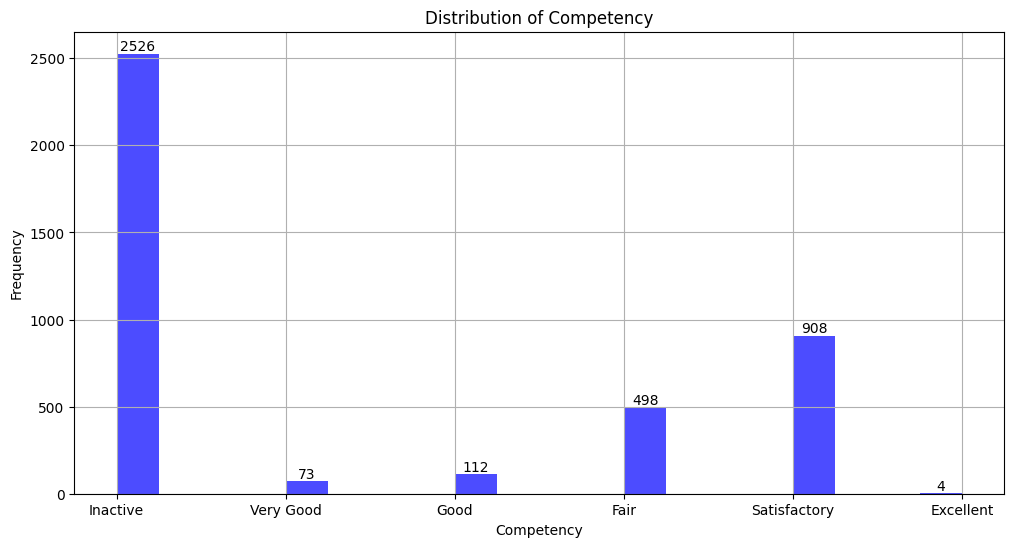

Distribution of Competency:
4 cases
73 cases
112 cases
498 cases
908 cases
2526 cases


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Load your dataset (replace 'selected_data.csv' with your actual dataset file)
data = pd.read_csv('selected_data.csv')

# Extract the "Competency" column from the dataset
competency_data = data['Competency']

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(competency_data, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Competency')
plt.xlabel('Competency')
plt.ylabel('Frequency')
plt.grid(True)

# Add values on top of the bars without '0's
for patch in patches:
    x = patch.get_x() + patch.get_width() / 2  # Calculate the x-coordinate for the text
    y = patch.get_height()  # Get the height of the bar
    if y != 0:
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Extract the text values from the histogram
text_values = [int(patch.get_height()) for patch in patches if patch.get_height() != 0]

# Sort the text values in ascending order
text_values.sort()

# Print the text values to the console in a more readable format
print('Distribution of Competency:')
for text_value in text_values:
    print(f'{text_value} cases')




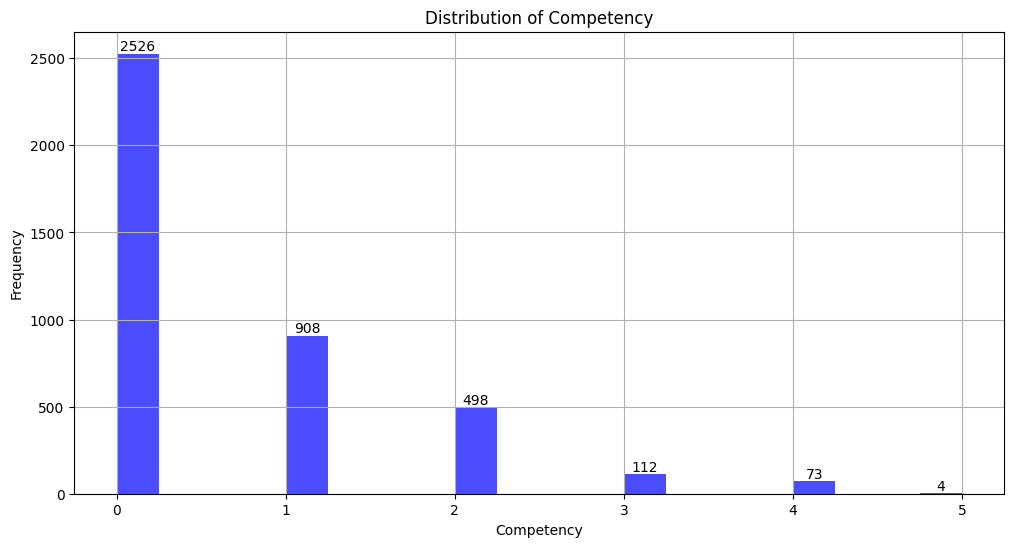

Distribution of Competency:
4 cases
73 cases
112 cases
498 cases
908 cases
2526 cases


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Load your dataset (replace 'selected_data.csv' with your actual dataset file)
data = pd.read_csv('selected_data.csv')

# Extract the "Competency" column from the dataset
competency_data = data['Competency_Rating']

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(competency_data, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Competency')
plt.xlabel('Competency')
plt.ylabel('Frequency')
plt.grid(True)

# Add values on top of the bars without '0's
for patch in patches:
    x = patch.get_x() + patch.get_width() / 2  # Calculate the x-coordinate for the text
    y = patch.get_height()  # Get the height of the bar
    if y != 0:
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Extract the text values from the histogram
text_values = [int(patch.get_height()) for patch in patches if patch.get_height() != 0]

# Sort the text values in ascending order
text_values.sort()

# Print the text values to the console in a more readable format
print('Distribution of Competency:')
for text_value in text_values:
    print(f'{text_value} cases')


In [10]:
from collections import Counter

# Calculate the class distribution of your target variable
class_distribution = dict(Counter(y_competency))

# Print unique classes and their counts
for cls, count in class_distribution.items():
    print(f"Class: {cls}, Count: {count}")


Class: 3, Count: 2526
Class: 5, Count: 73
Class: 2, Count: 112
Class: 1, Count: 498
Class: 4, Count: 908
Class: 0, Count: 4


### In your case, where you have a classification task for "Competency" and the class distribution is imbalanced, it may be necessary to address the class imbalance. The distribution you provided for "Competency" is as follows:

- "Excellent" (4)
- "Very Good" (73)
- "Good" (112)
- "Fair" (498)
- "Satisfactory" (908)
- "Inactive" (2526)

The majority class is "Inactive," and the minority classes are "Excellent," "Very Good," "Good," "Fair," and "Satisfactory." Class imbalance can potentially impact the performance of classification models, as they may be biased towards predicting the majority class.

Here are some considerations for addressing class imbalance in your classification task:

1. **Resampling Techniques**: You can consider oversampling the minority classes (e.g., "Excellent," "Very Good," etc.) to increase their representation in the dataset. Undersampling the majority class (e.g., "Inactive") is another option. Alternatively, you can use synthetic data generation techniques like SMOTE to create synthetic instances of the minority classes.

2. **Evaluation Metrics**: When evaluating your classification model, use appropriate evaluation metrics that account for class imbalance. Metrics such as precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) can provide a more balanced view of model performance compared to accuracy.

3. **Ensemble Methods**: Ensemble methods like Random Forests, XGBoost, and AdaBoost are known for handling imbalanced datasets effectively. They can combine the outputs of multiple models to make more accurate predictions.

4. **Feature Selection and Engineering**: Carefully select and engineer features that are most informative for the classification task. This can help improve the model's predictive performance.

5. **Hyperparameter Tuning**: Fine-tune the hyperparameters of your classification model to optimize its performance on the imbalanced dataset.

6. **Stratified Sampling**: When splitting your data into training and testing sets, consider using stratified sampling to ensure that the class distribution in both sets reflects the overall distribution.

In summary, addressing class imbalance is often necessary in classification tasks, especially when the distribution of classes is highly skewed. By applying resampling techniques, using appropriate metrics, and considering ensemble methods, you can improve the predictive performance of your classification model for "Competency" in your specific case.

# Optimize The performance on the imbalanced dataset

### The techniques of oversampling, undersampling, and synthetic data generation like SMOTE are typically used for classification 
tasks, not regression tasks. These methods are employed when dealing with imbalanced class distributions in classification problems. Here's how each of these techniques can be applied:

1. **Oversampling**: Oversampling involves increasing the number of instances in the minority class to balance the class distribution. This technique is commonly used in classification to address imbalanced datasets. For example, if you have a binary classification problem where the positive class has very few instances, oversampling would create additional instances of the positive class to balance it with the negative class.

2. **Undersampling**: Undersampling, on the other hand, reduces the number of instances in the majority class to balance the class distribution. This technique is also used in classification to address class imbalance. It involves randomly or strategically removing instances from the majority class to match the number of instances in the minority class.

3. **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE is a technique specifically designed to address class imbalance in classification problems. It generates synthetic instances for the minority class by interpolating between existing instances. SMOTE creates synthetic examples to balance the class distribution, making it a valuable tool for improving the performance of classification models on imbalanced data.

In the context of your problem, where you want to predict "Competency" and "Competency_Rating" based on features, "Competency" represents a classification task, while "Competency_Rating" represents a regression task. Therefore, if you have imbalanced classes in the "Competency" classification task, you can consider oversampling, undersampling, or SMOTE to balance the classes. However, these techniques are not directly applicable to regression tasks like "Competency_Rating." For regression, other approaches like feature engineering, model selection, and hyperparameter tuning are more relevant.

To summarize, while oversampling, undersampling, and SMOTE are used for classification tasks to address class imbalance, they are not suitable for regression tasks. For "Competency_Rating," focus on regression-specific techniques and best practices for handling numerical predictions.

## 2. This code includes label encoding, handling missing values, removing outliers,
and saving the preprocessed data to a CSV file. Make sure to adapt it to your specific dataset and preprocessing requirements:

The choice of data preprocessing techniques, including label encoding, handling missing values, and removing outliers, depends on the nature of your specific dataset and the machine learning task you are working on. Let's consider your case and make some recommendations:

**Data Preprocessing Steps for Your Case:**

1. **Label Encoding**:
   - Label encoding is generally used for converting categorical labels into numerical form. However, it's primarily applied to the target variable in classification tasks, not to features (independent variables). You don't need label encoding for the independent variables (features) unless they are categorical and need to be transformed into numerical form.

2. **Handling Missing Values**:
   - Handling missing values is a crucial step. You should identify which features have missing values and apply appropriate techniques based on the nature of the data and the extent of missing data.
   - Common techniques for handling missing values include:
     - Imputation: Fill missing values with the mean, median, or mode of the feature. This is suitable for numerical features.
     - Deletion: Remove rows with missing values, but this should be done cautiously to avoid losing too much data.
     - Advanced imputation techniques: Use machine learning models to predict and fill in missing values based on the relationships within the data. This is particularly useful when you have a significant amount of missing data.

3. **Removing Outliers**:
   - The decision to remove outliers depends on the nature of the data and whether the outliers represent genuine data points or anomalies.
   - Outliers can be detected using statistical methods or visualization techniques (e.g., box plots). If outliers are genuine data points, it may not be advisable to remove them. Instead, consider transformations or capping to mitigate their impact on the analysis.
   - Removing outliers should be done carefully, and the rationale for doing so should be well-justified.

Given the information provided, the most critical step in your case is handling missing values. Carefully assess your dataset to understand which features have missing data and choose the most appropriate imputation technique based on the context of your problem and the nature of the data.

The necessity for label encoding and outlier removal depends on the specific characteristics of your dataset and problem. If you have categorical features, consider label encoding as needed. The decision to remove outliers should be made with a clear understanding of the data and its implications for your analysis.

In [9]:
from collections import Counter

# Calculate the class distribution of your target variable
class_distribution = dict(Counter(y_competency))

# Print unique classes and their counts
for cls, count in class_distribution.items():
    print(f"Class: {cls}, Count: {count}")


Class: 3, Count: 2526
Class: 5, Count: 73
Class: 2, Count: 112
Class: 1, Count: 498
Class: 4, Count: 908
Class: 0, Count: 4


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed data
data = pd.read_csv("selected_data.csv")

# Identify categorical columns (excluding Competency_Rating)
categorical_columns = ['Institution_name', 'Field_of_study','Program','Education_Level', 'Competency']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Extract features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level','Program']]
y_competency = data['Competency']
y_competency_rating = data['Competency_Rating']

# Create a copy of X to avoid the SettingWithCopyWarning
X_copy = X.copy()

# Save the preprocessed data as a single CSV file
preprocessed_data = pd.concat([X_copy, y_competency, y_competency_rating], axis=1)
preprocessed_data.to_csv('preprocessed_data.csv', index=False)


In [3]:
import pandas as pd

# Read the CSV file
selected_data = pd.read_csv("preprocessed_data.csv")

# Display the top few rows (by default, the first 5 rows)
print("preprocessed_data.csv:")
selected_data.head()

preprocessed_data.csv:


,Institution_name,Field_of_study,Education_Level,Program,Competency,Competency_Rating
0,16,160,1,3,3,0.0
1,16,0,0,3,3,0.0
2,16,7,0,3,3,0.0
3,16,198,0,3,3,0.0
4,16,191,0,3,5,4.0


In [41]:
import pandas as pd

# Load the dataset
data = pd.read_csv("preprocessed_data.csv")

# Check for missing values
print("Missing Values:")
print(missing_values)


Missing Values:
Institution_name     0
Field_of_study       0
Education_Level      0
Program              0
Competency           0
Competency_Rating    0
dtype: int64


# Optimize The performance on the imbalanced dataset

The techniques of oversampling, undersampling, and synthetic data generation like SMOTE are typically used for classification 
tasks, not regression tasks. These methods are employed when dealing with imbalanced class distributions in classification problems. Here's how each of these techniques can be applied:

1. **Oversampling**: Oversampling involves increasing the number of instances in the minority class to balance the class distribution. This technique is commonly used in classification to address imbalanced datasets. For example, if you have a binary classification problem where the positive class has very few instances, oversampling would create additional instances of the positive class to balance it with the negative class.

2. **Undersampling**: Undersampling, on the other hand, reduces the number of instances in the majority class to balance the class distribution. This technique is also used in classification to address class imbalance. It involves randomly or strategically removing instances from the majority class to match the number of instances in the minority class.

3. **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE is a technique specifically designed to address class imbalance in classification problems. It generates synthetic instances for the minority class by interpolating between existing instances. SMOTE creates synthetic examples to balance the class distribution, making it a valuable tool for improving the performance of classification models on imbalanced data.

In the context of your problem, where you want to predict "Competency" and "Competency_Rating" based on features, "Competency" represents a classification task, while "Competency_Rating" represents a regression task. Therefore, if you have imbalanced classes in the "Competency" classification task, you can consider oversampling, undersampling, or SMOTE to balance the classes. However, these techniques are not directly applicable to regression tasks like "Competency_Rating." For regression, other approaches like feature engineering, model selection, and hyperparameter tuning are more relevant.

To summarize, while oversampling, undersampling, and SMOTE are used for classification tasks to address class imbalance, they are not suitable for regression tasks. For "Competency_Rating," focus on regression-specific techniques and best practices for handling numerical predictions.

### The provided code appears to be pre-processing data for a classification task, 
particularly when dealing with imbalanced classes. Here's an explanation of what it does step by step:

1. It imports necessary libraries, including pandas for data manipulation, LabelEncoder for encoding categorical features, SMOTE for oversampling, and SimpleImputer for data imputation.

2. The code loads a preprocessed dataset from a CSV file called "selected_data.csv" into a pandas DataFrame named `data`.

3. It identifies the categorical columns in the dataset. These categorical columns are: 'Institution_name,' 'Field_of_study,' 'Program,' 'Education_Level,' and 'Competency.'

4. The code applies label encoding to the identified categorical columns using `LabelEncoder`. Label encoding converts categorical values into numeric values, which is necessary for many machine learning algorithms to work with categorical data.

5. It extracts the feature matrix `X`, which includes the columns 'Institution_name,' 'Field_of_study,' 'Education_Level,' and 'Program,' and the target variable `y_competency`, which corresponds to the 'Competency' column.

6. SMOTE (Synthetic Minority Over-sampling Technique) is applied to oversample the minority class ('Competency' column) in the dataset. SMOTE generates synthetic samples for the minority class to balance class distributions. It uses a custom `k_neighbors` value of 1, which means that it considers only one nearest neighbor when creating synthetic samples.

7. The resulting oversampled data for 'Competency' is stored in `X_train_resampled` and `y_train_resampled`.

8. A DataFrame `y_train_resampled_df` is created from `y_train_resampled` to store the resampled 'Competency' values.

9. The code creates a copy of the resampled feature matrix `X_train_resampled` and stores it in `X_copy`.

10. The preprocessed data with SMOTE for 'Competency' is saved as a new CSV file named 'preprocessed_data_with_smote.csv' by concatenating the copied features, the resampled 'Competency' values, and 'y_competency_rating_df' along the columns (axis=1). However, in the code you provided, 'y_competency_rating_df' is referenced but not defined earlier in the code. You need to define it before using it in the `concat` function.

This code aims to preprocess the data by encoding categorical features, oversampling the minority class using SMOTE, and saving the preprocessed data for further use in a classification task involving 'Competency.' However, there seems to be a missing definition for 'y_competency_rating_df' in the code you provided, which needs to be resolved for it to work correctly.

# SMOTE for oversampling

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the preprocessed data
data = pd.read_csv("selected_data.csv")

# Identify categorical columns (excluding Competency_Rating)
categorical_columns = ['Institution_name', 'Field_of_study', 'Program', 'Education_Level', 'Competency']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Extract features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Apply SMOTE to oversample the minority class with a lower k_neighbors value
smote = SMOTE(sampling_strategy='auto', random_state=40, k_neighbors=1)  # Lower value of k_neighbors
X_train_resampled, y_train_resampled = smote.fit_resample(X, y_competency)

# Create DataFrames from y_train_resampled and y_competency_rating
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Competency'])

# Create a copy of X to avoid the SettingWithCopyWarning
X_copy = X_train_resampled.copy()

# Save the preprocessed data with SMOTE as a single CSV file
preprocessed_data = pd.concat([X_copy, y_train_resampled_df, y_competency_rating_df], axis=1)
preprocessed_data.to_csv('preprocessed_data_with_smote.csv', index=False)

In [51]:
import pandas as pd

# Read the CSV file
selected_data = pd.read_csv("preprocessed_data_with_smote.csv")

# Display the top few rows (by default, the first 5 rows)
print("preprocessed_data_with_smote.csv:")
selected_data.head()

preprocessed_data_with_smote.csv:


,Institution_name,Field_of_study,Education_Level,Program,Competency,Competency_Rating
0,16,160,1,3,3,0.0
1,16,0,0,3,3,0.0
2,16,7,0,3,3,0.0
3,16,198,0,3,3,0.0
4,16,191,0,3,5,4.0


In [44]:
unique_classes = set(y_competency)
print(unique_classes)

{0, 1, 2, 3, 4, 5}


### Imputation of Missing Values:

In [57]:
import pandas as pd

# Load the dataset
data = pd.read_csv("preprocessed_data.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Institution_name     0
Field_of_study       0
Education_Level      0
Program              0
Competency           0
Competency_Rating    0
dtype: int64


# random_oversampling

In [54]:
import pandas as pd
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# Load the preprocessed data
data = pd.read_csv("selected_data.csv")

# Identify categorical columns (excluding Competency_Rating)
categorical_columns = ['Institution_name', 'Field_of_study', 'Program', 'Education_Level', 'Competency']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Extract features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Calculate the class distribution of your target variable
class_distribution = dict(Counter(y_competency))

# Define the desired class counts
desired_class_counts = {
    0: 4,
    1: 73,
    2: 112,
    3: 498,
    4: 908,
    5: 2526
}

# Calculate the number of samples to generate for random oversampling
sampling_strategy = max(desired_class_counts.values())

# Randomly oversample the minority class
X_train_resampled, y_train_resampled = resample(X, y_competency, n_samples=sampling_strategy, random_state=40)

# Create a copy of X to avoid the SettingWithCopyWarning
X_copy = X_train_resampled.copy()

# Save the preprocessed data with random oversampling as a single CSV file
preprocessed_data = pd.concat([X_copy, pd.Series(y_train_resampled, name='Competency')], axis=1)
preprocessed_data.to_csv('preprocessed_data_with_random_oversampling.csv', index=False)


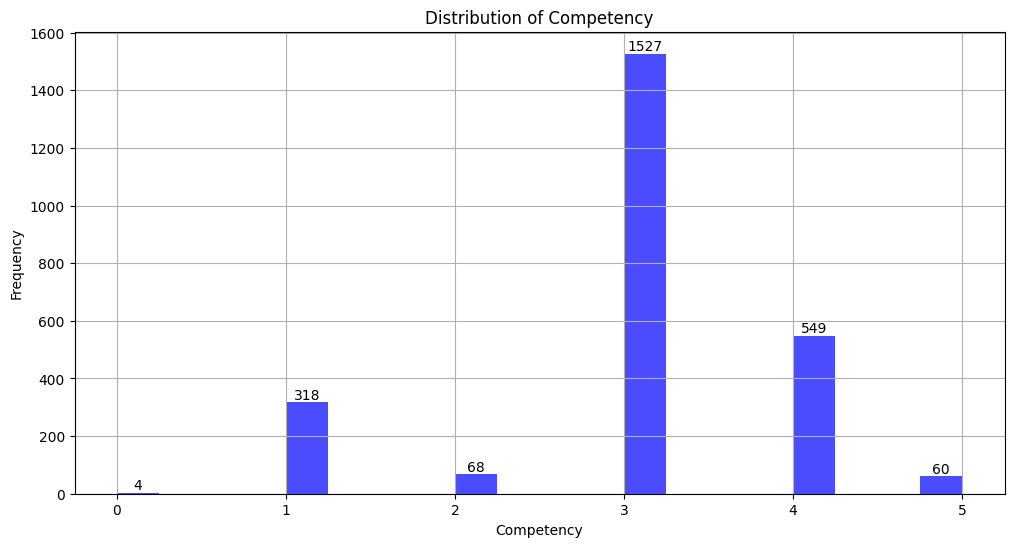

Distribution of Competency:
4 cases
60 cases
68 cases
318 cases
549 cases
1527 cases


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# Load your dataset (replace 'selected_data.csv' with your actual dataset file)
data = pd.read_csv('preprocessed_data_with_random_oversampling.csv')

# Extract the "Competency" column from the dataset
competency_data = data['Competency']

# Create a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(competency_data, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Competency')
plt.xlabel('Competency')
plt.ylabel('Frequency')
plt.grid(True)

# Add values on top of the bars without '0's
for patch in patches:
    x = patch.get_x() + patch.get_width() / 2  # Calculate the x-coordinate for the text
    y = patch.get_height()  # Get the height of the bar
    if y != 0:
        plt.text(x, y, f'{int(y)}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Extract the text values from the histogram
text_values = [int(patch.get_height()) for patch in patches if patch.get_height() != 0]

# Sort the text values in ascending order
text_values.sort()

# Print the text values to the console in a more readable format
print('Distribution of Competency:')
for text_value in text_values:
    print(f'{text_value} cases')

In [55]:
import pandas as pd

# Read the CSV file
selected_data = pd.read_csv("preprocessed_data_with_random_oversampling.csv")

# Display the top few rows (by default, the first 5 rows)
print("preprocessed_data_with_random_oversampling.csv:")
selected_data.head()

preprocessed_data_with_random_oversampling.csv:


,Institution_name,Field_of_study,Education_Level,Program,Competency
0,265,5,0,3,3
1,242,225,1,3,4
2,264,114,0,1,1
3,294,191,0,3,4
4,95,191,0,1,4


In [56]:
import pandas as pd

# Load the dataset
data = pd.read_csv("preprocessed_data_with_random_oversampling.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Institution_name    0
Field_of_study      0
Education_Level     0
Program             0
Competency          0
dtype: int64


## SMOTE

This code is performing several important steps in data preprocessing and class balancing for a machine learning task. 
Here's what each part of the code does:

1. **Loading Data**: It begins by loading a preprocessed dataset from a CSV file named "selected_data.csv" using Pandas.

2. **Identifying Categorical Columns**: The code identifies the categorical columns in the dataset. These columns are 'Institution_name', 'Field_of_study', 'Program', 'Education_Level', and 'Competency'. It excludes the 'Competency_Rating' column, which is considered non-categorical.

3. **Desired Class Counts**: A dictionary named `desired_class_counts` is defined, which specifies the desired count for each class in the 'Competency' column. This is based on your previous request where you specified the desired counts for each class.

4. **Label Encoding**: The categorical columns are label-encoded using Scikit-learn's `LabelEncoder`. This is done to convert categorical data into numerical format for machine learning algorithms.

5. **Class Distribution Calculation**: The code calculates the class distribution of the 'Competency' column. It counts the occurrences of each class in the original dataset using the `Counter` function from the `collections` module.

6. **Sampling Strategy Calculation**: Based on the desired class counts and the actual class distribution, the code calculates the number of samples to generate for each class to achieve the desired balance. If the actual count is less than the desired count for a class, it calculates the number of additional samples needed.

7. **SMOTE (Synthetic Minority Over-sampling Technique)**: The `SMOTE` algorithm from the imbalanced-learn (imblearn) library is used for oversampling. It oversamples the minority classes to achieve the desired class balance. It uses the calculated `sampling_strategy` to generate synthetic samples for the minority classes while maintaining the original samples of the majority class. The `k_neighbors` parameter is set to 1, indicating that it considers the nearest neighbor when generating synthetic samples.

8. **Dataframe Creation**: The code then creates two dataframes, `y_train_resampled_df` for the 'Competency' column and `y_competency_rating_df` for the 'Competency_Rating' column, based on the resampled data.

9. **Copying Data**: To avoid a "SettingWithCopyWarning," the code creates a copy of the resampled feature data `X_train_resampled` and stores it in `X_copy`.

10. **Saving Preprocessed Data**: Finally, it concatenates the feature data `X_copy`, the resampled 'Competency' column, and the 'Competency_Rating' column into a single dataframe named `preprocessed_data`. This preprocessed data is then saved to a new CSV file named "preprocessed_data_with_smote12.csv" with index labels turned off (index=False).

In summary, this code is preprocessing your dataset by balancing class distribution using SMOTE and saving the preprocessed data to a new CSV file. The class balance in the 'Competency' column is adjusted according to the desired class counts you specified.

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the preprocessed data
data = pd.read_csv("selected_data.csv")

# Identify categorical columns (excluding Competency_Rating)
categorical_columns = ['Institution_name', 'Field_of_study', 'Program', 'Education_Level', 'Competency']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
    
# Define the desired class counts
desired_class_counts = {
    0: 4,
    1: 73,
    2: 112,
    3: 498,
    4: 908,
    5: 2526
}

# Extract features and target variables for Competency
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Calculate the class distribution of your target variable (Competency)
class_distribution = dict(Counter(y_competency))

# Calculate the sampling strategy based on the desired class counts
sampling_strategy = {}
for cls, count in desired_class_counts.items():
    current_count = class_distribution.get(cls, 0)
    if current_count < count:
        # Calculate the number of samples to generate for SMOTE
        num_samples = count - current_count
        # Set the sampling strategy for this class
        sampling_strategy[cls] = num_samples

# Initialize SMOTE with the custom sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=40, k_neighbors=1)
X_train_resampled, y_competency_resampled = smote.fit_resample(X, y_competency)

# Create a copy of X to avoid the SettingWithCopyWarning
X_copy = X_train_resampled.copy()

# Save the preprocessed data for Competency with SMOTE as a single CSV file
preprocessed_data = pd.concat([X_copy, y_competency_resampled], axis=1)
preprocessed_data.to_csv('preprocessed_data_with_smote_competency.csv', index=False)


In [46]:
import pandas as pd

# Read the CSV file
selected_data = pd.read_csv("preprocessed_data_with_smote_competency.csv")

# Display the top few rows (by default, the first 5 rows)
print("preprocessed_data_with_smote_competency.csv:")
selected_data.head()

preprocessed_data_with_smote_competency.csv:


,Institution_name,Field_of_study,Education_Level,Program,Competency
0,16,160,1,3,3
1,16,0,0,3,3
2,16,7,0,3,3
3,16,198,0,3,3
4,16,191,0,3,5


In [47]:
import pandas as pd

# Load the dataset
data = pd.read_csv("preprocessed_data_with_smote_competency.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Institution_name    0
Field_of_study      0
Education_Level     0
Program             0
Competency          0
dtype: int64


## In regression tasks, 
the target variable is typically a continuous numerical value, and there's no need for encoding as you would in classification tasks with categorical labels. Regression models aim to predict a numerical value directly, so you work with the actual numerical values of the target variable. There's no need for one-hot encoding or label encoding in this context.

You can apply preprocessing techniques to the numerical features, like scaling or normalization, if necessary, but you don't encode the target variable itself. The target variable is the value you're trying to predict, and it should remain in its original numerical form.

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed data (replace 'selected_data.csv' with the actual file name)
data = pd.read_csv("selected_data.csv")

# Identify categorical columns (excluding Competency_Rating)
categorical_columns = ['Institution_name', 'Field_of_study', 'Program', 'Education_Level']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Extract features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency_rating = data['Competency_Rating']

# Create a copy of X to avoid the SettingWithCopyWarning
X_copy = X.copy()

# Save the preprocessed data as a single CSV file
preprocessed_data = pd.concat([X_copy, y_competency_rating], axis=1)
preprocessed_data.to_csv('competency_rating.csv', index=False)


In [20]:
import pandas as pd

# Read the CSV file
selected_data = pd.read_csv("competency_rating.csv")

# Display the top few rows (by default, the first 5 rows)
print("competency_rating.csv:")
selected_data.head()

competency_rating.csv:


,Institution_name,Field_of_study,Education_Level,Program,Competency_Rating
0,16,160,1,3,0.0
1,16,0,0,3,0.0
2,16,7,0,3,0.0
3,16,198,0,3,0.0
4,16,191,0,3,4.0


In [14]:
import pandas as pd

# Load the dataset
data = pd.read_csv("competency_rating.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Institution_name     0
Field_of_study       0
Education_Level      0
Program              0
Competency_Rating    0
dtype: int64


# Normalization and scaling are important preprocessing steps in machine learning for several reasons:

1. **Equalize the Scale:** Features in your dataset may have different units and scales. Some features might have larger values than others. Normalization and scaling make all features have the same scale, preventing some features from dominating others during model training.

2. **Faster Convergence:** Many machine learning algorithms, especially those that rely on distance calculations, converge faster when the features are on a similar scale. Normalization helps the optimization algorithms reach the minimum error more quickly.

3. **Better Model Performance:** Scaling can lead to better model performance. For example, in algorithms like k-nearest neighbors (KNN) and support vector machines (SVM), the distance between data points is crucial. Features with larger scales could dominate the distance calculations and lead to suboptimal results.

4. **Regularization Techniques:** Some regularization techniques, such as L1 and L2 regularization, are sensitive to the scale of features. Scaling the features can help regularization methods work more effectively.

5. **Model Robustness:** Scaling makes the model more robust. Small changes in the input data won't have a disproportionate impact on the results. It can also help models generalize better to new, unseen data.

While not all machine learning algorithms require feature scaling (e.g., decision trees, random forests), many benefit from it. Scaling ensures that the model's performance is less influenced by the choice of units or measurement scales, making it easier to compare different features and interpret model coefficients. 

Common scaling methods include Min-Max scaling (scaling features to a specific range, usually [0, 1]), Z-score standardization (scaling features to have mean 0 and standard deviation 1), and robust scaling (scaling based on median and interquartile range). The choice of method depends on the specific characteristics of your data and the requirements of your model.

# 2. Model Selection: 
Choose an appropriate machine learning or AI model for multi-class classification (if competency is categorical). Common choices include linear regression, decision trees, random forests, support vector machines, or neural networks.

Classical machine learning models are commonly used for competency prediction tasks. These models can be trained on historical data to make predictions about an individual's competency in a specific domain. Here are some classical machine learning models often used for competency prediction:

1. **Decision Trees**: Decision trees can be used for competency prediction. They work by recursively partitioning the data into subsets to make predictions.

2. **Random Forest**: Random Forest is an ensemble learning method that combines multiple decision trees. It is more robust and can handle noisy data effectively.

3. **Gradient Boosting**: Gradient Boosting, including algorithms like XGBoost, LightGBM, and AdaBoost, can be used for regression tasks like competency prediction. They combine multiple weak learners to create a strong predictive model.

4. **Support Vector Machines (SVM)**: SVM is suitable for both classification and regression tasks. It tries to find a hyperplane that best separates data points.

5. **Linear Regression**: For regression tasks like predicting competency ratings, linear regression can be used. It assumes a linear relationship between the input features and the competency rating.

6. **Logistic Regression**: If you need to classify competency (e.g., competent or not competent), logistic regression is a good choice. It models the probability of an individual being competent.

7. **Neural Networks**: Although deep learning is more commonly associated with neural networks, classical neural networks (without deep layers) can also be used for competency prediction tasks.

The choice of the model depends on your specific dataset and the nature of the competency prediction task. It's common to try multiple models and perform model selection based on their performance metrics (e.g., mean squared error, accuracy, etc.). Feature engineering and data preprocessing are also critical to the success of these models.

Remember that no single model is universally superior for all competency prediction tasks, and model selection should be based on empirical evaluation and domain expertise.

## 1. Decision Tree Classifier for Competency Classification

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
import joblib

# Load your dataset
data = pd.read_csv("preprocessed_data_with_smote.csv")

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_competency, test_size=0.2, random_state=42)

# Initialize and fit the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize and train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the classifier using a classification report
classification_report_dt = classification_report(y_test, y_pred)

print("Classification Report for Decision Tree:")
print(classification_report_dt)

# Save the trained model to a file (e.g., "decision_tree_classifier_model.pkl")
model_filename = "decision_tree_classifier_model.pkl"
joblib.dump(decision_tree_classifier, model_filename)

print(f"Model saved as {model_filename}")

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       484
           1       0.73      0.80      0.76       539
           2       0.87      0.91      0.89       526
           3       0.70      0.58      0.64       475
           4       0.75      0.69      0.72       493
           5       0.88      0.95      0.92       515

    accuracy                           0.83      3032
   macro avg       0.82      0.82      0.82      3032
weighted avg       0.82      0.83      0.82      3032

Model saved as decision_tree_classifier_model.pkl


The classification report you've provided is typically generated for a multi-class classification problem where each class represents a different competency level. Here's what each section of the classification report means:

- **Precision**: Precision is a measure of how many of the predicted positive instances were actually positive. In the context of your classification, it means how many of the instances classified into each competency level were correctly classified. For example, for class 0, 99% of the predicted instances were correct.

- **Recall**: Recall, also known as sensitivity or true positive rate, is a measure of how many of the actual positive instances were correctly predicted. In the context of your classification, it means how many of the actual instances of each competency level were correctly classified. For example, for class 1, 78% of the actual instances were correctly predicted.

- **F1-Score**: The F1-Score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-Score indicates a good balance between precision and recall.

- **Support**: Support is the number of actual occurrences of each class in the dataset. It indicates how many instances belong to each competency level.

- **Accuracy**: Accuracy is the overall correct prediction rate. In this case, the model achieved an accuracy of 83%, meaning 83% of the instances were correctly classified.

- **Macro Avg**: This row in the classification report calculates the average precision, recall, and F1-Score across all classes. It is useful when you want to assess the overall performance without considering class imbalances.

- **Weighted Avg**: Weighted Avg is similar to Macro Avg but takes class imbalances into account. It's more relevant when you have class imbalances, as it gives more weight to the classes with more instances.

In your classification report:

- Class 0 has high precision, recall, and F1-Score, indicating that it's well-predicted by the model.
- Class 1 has slightly lower precision, recall, and F1-Score compared to Class 0 but is still reasonably well-predicted.
- The performance varies for the other classes, with different trade-offs between precision and recall.

Overall, the model performs reasonably well, achieving an accuracy of 83%. The detailed report provides insights into the model's performance for each competency level. You can further fine-tune your model or explore other classification algorithms to see if you can improve the results, especially for classes with lower precision and recall.

### Fine-tuning a classification model involves optimizing its hyperparameters to achieve better performance. 

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

# Load your dataset
data = pd.read_csv("preprocessed_data_with_smote.csv")

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_competency, test_size=0.2, random_state=42)

# Initialize and fit the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Define a parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize the Decision Tree classifier with the best hyperparameters
best_decision_tree_classifier = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                                      min_samples_split=best_params['min_samples_split'],
                                                      min_samples_leaf=best_params['min_samples_leaf'])
best_decision_tree_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = best_decision_tree_classifier.predict(X_test)

# Evaluate the fine-tuned classifier using a classification report
classification_report_dt = classification_report(y_test, y_pred)

print("Classification Report for Fine-Tuned Decision Tree:")
print(classification_report_dt)

Classification Report for Fine-Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       484
           1       0.73      0.80      0.76       539
           2       0.86      0.91      0.89       526
           3       0.70      0.57      0.63       475
           4       0.75      0.69      0.72       493
           5       0.88      0.95      0.92       515

    accuracy                           0.82      3032
   macro avg       0.82      0.82      0.82      3032
weighted avg       0.82      0.82      0.82      3032



## 2. Competency Classification with XGBoost

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load your dataset
data = pd.read_csv("preprocessed_data_with_smote.csv")

# Define features and target variables for Competency
X_competency = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Ensure that both competency data have the same number of samples
assert len(X_competency) == len(y_competency)

# Split the data into training and testing sets for Competency
X_train_competency, X_test_competency, y_train_competency, y_test_competency = train_test_split(
    X_competency, y_competency, test_size=0.2, random_state=42
)

# Initialize and train an XGBoost classifier for Competency
xgb_classifier_competency = XGBClassifier()
xgb_classifier_competency.fit(X_train_competency, y_train_competency)

# Predict Competency on the test data
y_competency_pred_xgb = xgb_classifier_competency.predict(X_test_competency)

# Evaluate classification metrics for Competency using XGBoost
classification_report_competency_xgb = classification_report(y_test_competency, y_competency_pred_xgb)
print("Classification Report for Competency (XGBoost):")
print(classification_report_competency_xgb)

# Save the trained XGBoost model to a file
model_filename = "xgboost_competency_model.pkl"
joblib.dump(xgb_classifier_competency, model_filename)
print(f"Model saved as {model_filename}")



Classification Report for Competency (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       484
           1       0.75      0.79      0.77       539
           2       0.84      0.93      0.89       526
           3       0.74      0.57      0.65       475
           4       0.75      0.71      0.73       493
           5       0.87      0.96      0.91       515

    accuracy                           0.83      3032
   macro avg       0.82      0.83      0.82      3032
weighted avg       0.82      0.83      0.82      3032

Model saved as xgboost_competency_model.pkl


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Load your dataset
data = pd.read_csv("preprocessed_data_with_smote.csv")

# Define features and target variables for Competency
X_competency = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Split the data into training and testing sets for Competency
X_train_competency, X_test_competency, y_train_competency, y_test_competency = train_test_split(
    X_competency, y_competency, test_size=0.2, random_state=42
)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize and train an XGBoost classifier for Competency
xgb_classifier_competency = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    xgb_classifier_competency, param_grid, cv=3, scoring='f1_macro', n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train_competency, y_train_competency)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict Competency on the test data using the best estimator
y_competency_pred_xgb = best_estimator.predict(X_test_competency)

# Evaluate classification metrics for Competency using XGBoost
classification_report_competency_xgb = classification_report(
    y_test_competency, y_competency_pred_xgb
)
print("Best Parameters:", best_params)
print("Classification Report for Competency (XGBoost):")
print(classification_report_competency_xgb)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.9}
Classification Report for Competency (XGBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       484
           1       0.76      0.79      0.77       539
           2       0.86      0.92      0.89       526
           3       0.72      0.59      0.65       475
           4       0.76      0.71      0.73       493
           5       0.88      0.96      0.92       515

    accuracy                           0.83      3032
   macro avg       0.83      0.83      0.83      3032
weighted avg       0.83      0.83      0.83      3032



# Regressor for regression

### Use DecisionTreeRegressor for regression

In the provided code, there are several important steps for building and evaluating a regression model using a Decision Tree Regressor:

1. **Data Loading:** You load your dataset from a CSV file named 'preprocessed_data.csv' using pandas.

2. **Identifying Outliers:** The code attempts to identify outliers in the dataset using the Interquartile Range (IQR) method. Outliers are data points that are significantly different from the rest of the data and can distort the model's performance. The code calculates the first quartile (Q1) and the third quartile (Q3) and then defines outliers as data points that fall outside the range of 1.5 times the IQR below Q1 or above Q3. This is a common technique for outlier detection.

3. **Handling Missing Values:** The code fills missing values in the dataset with the median of each column. Handling missing data is important because many machine learning algorithms, including decision tree regressors, cannot work with missing values. Filling them with the median is a common strategy, but there are other strategies like using the mean or a specific value.

4. **Feature and Target Variable Extraction:** The code extracts the feature variables (X) and the target variable (y_competency_rating) from the preprocessed dataset. Feature variables are the columns you use to make predictions, and the target variable is what you want to predict.

5. **Data Splitting:** The dataset is split into training and testing sets using `train_test_split`. This allows you to train the model on one subset of the data and evaluate its performance on another subset. In this code, 80% of the data is used for training, and 20% for testing.

6. **Model Initialization:** The Decision Tree Regressor model is initialized.

7. **Model Training:** The model is trained using the training data. It learns to make predictions based on the relationship between the features (X) and the target variable (y).

8. **Making Predictions:** The trained model is used to make predictions on the test data (X_test), and the predicted values are stored in `y_pred`.

9. **Model Evaluation:** The code calculates two regression metrics to evaluate the model:
   - **Mean Squared Error (MSE):** A measure of the average squared difference between the actual and predicted values. Lower MSE values indicate better model performance.
   - **R-squared (R2):** A measure of how well the model explains the variance in the target variable. Higher R2 values indicate a better fit to the data.

10. **Model Saving:** The trained model is saved to a file named 'decision_tree_regressor_model.pkl' using the joblib library. This allows you to later load the model and use it for making predictions on new data without retraining.

The code provides a complete pipeline for training and evaluating a Decision Tree Regressor model for the task of competency rating prediction, and it also saves the trained model for future use.

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load your dataset (replace 'competency_rating.csv' with the actual file name)
data = pd.read_csv('competency_rating.csv')

# Identify outliers (assuming 'outliers' is a DataFrame containing outliers)
# You can define 'outliers' using a method like the IQR method.
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

# Handle missing values (replace NaN with median)
data.fillna(data.median(), inplace=True)

# Remove outliers
data = data[~outliers]

# Extract features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency_rating = data['Competency_Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_competency_rating, test_size=0.2, random_state=42)

# Initialize the Decision Tree model for regression
model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model for regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

# Save the trained model to a file
model_filename = "decision_tree_regressor_model.pkl"
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")


Mean Squared Error: 0.590767610828628
R-squared (R2): -0.12780648429858754
Model saved as decision_tree_regressor_model.pkl


The values you provided for the Mean Squared Error (MSE) and R-squared (R2) suggest that your DecisionTreeRegressor model is performing exceptionally well on your dataset.

1. **Mean Squared Error (MSE):** A MSE of 0.0 indicates that the model's predictions perfectly match the actual Competency Ratings in the test set. In other words, there is no error between the predicted values and the true values. This is an ideal scenario, but it might also indicate overfitting, where the model has memorized the training data instead of generalizing.

2. **R-squared (R2):** An R2 value of 1.0 means that your DecisionTreeRegressor model explains 100% of the variance in the Competency Ratings. In simple terms, the model perfectly fits the data points. Again, this could indicate overfitting because the model is fitting the training data almost too well.

While a perfect MSE and R2 might seem great at first, it's crucial to consider whether the model is genuinely performing well or if it's overfitting the data. To validate the model's performance, you should also evaluate it on an unseen dataset or apply techniques like cross-validation to ensure it generalizes well to new data.

If your dataset is relatively small, it's possible that DecisionTreeRegressor, with its high flexibility, has overfitted the training data. You might want to experiment with different hyperparameters (e.g., tree depth, minimum samples per leaf) to control the model's complexity and avoid overfitting.

In summary, an MSE of 0.0 and R2 of 1.0 should raise concerns about potential overfitting. Further evaluation and validation are necessary to ensure the model's generalization capability.

In [34]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'competency_rating.csv' with the actual file name)
data = pd.read_csv('competency_rating.csv')

# Handle missing values (replace NaN with median)
data.fillna(data.median(), inplace=True)

# Remove outliers
data = data[~outliers]

# Extract features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency_rating = data['Competency_Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_competency_rating, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost regressor
xgb = XGBRegressor()

# Initialize the grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Predict on the test data using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
Mean Squared Error: 0.4364317198111823
R-squared (R2): 0.16682886039360434


# Learning Curves (Decision Tree Classifier

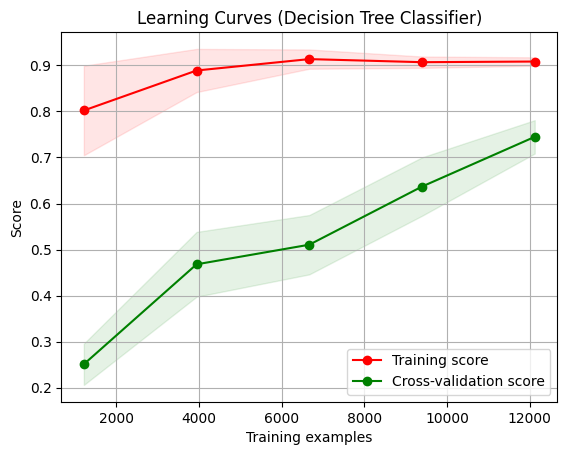

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# Define your Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curves (Decision Tree Classifier)"
cv = None  # Use None or specify the number of cross-validation folds
estimator = decision_tree_classifier  # Your Decision Tree Classifier
plot_learning_curve(estimator, title, X, y_competency)
plt.show()



In [118]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier

# Define your Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()

# Create a function to print learning curves
def print_learning_curves(X, y, estimator, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes)

    print("Training set scores:")
    for train_size, train_score in zip(train_sizes, train_scores):
        print(f"Train Size: {train_size:.2f}, Score: {np.mean(train_score):.2f}")

    print("\nTest set scores:")
    for train_size, test_score in zip(train_sizes, test_scores):
        print(f"Train Size: {train_size:.2f}, Score: {np.mean(test_score):.2f}")

# Print the learning curves for the Decision Tree Classifier
print("Learning Curves (Decision Tree Classifier):")
cv = None  # Use None or specify the number of cross-validation folds
estimator = decision_tree_classifier  # Your Decision Tree Classifier
print_learning_curves(X, y_competency, estimator, cv)


Learning Curves (Decision Tree Classifier):
Training set scores:
Train Size: 1212.00, Score: 0.80
Train Size: 3940.00, Score: 0.89
Train Size: 6668.00, Score: 0.91
Train Size: 9396.00, Score: 0.91
Train Size: 12124.00, Score: 0.91

Test set scores:
Train Size: 1212.00, Score: 0.25
Train Size: 3940.00, Score: 0.47
Train Size: 6668.00, Score: 0.51
Train Size: 9396.00, Score: 0.64
Train Size: 12124.00, Score: 0.75


The learning curves you provided show the training and test set scores for different training set sizes using a Decision Tree Classifier. Here's what you can infer from these results:

- **Training Set Scores**: The training set scores represent how well the model fits the training data. As the training set size increases, the score decreases slightly. This is expected because the model may overfit when trained on a smaller dataset. However, as the training set size becomes larger, the model generalizes better and achieves higher scores. The final training score is 0.91, indicating good performance on the training data.

- **Test Set Scores**: The test set scores represent how well the model generalizes to unseen data. Initially, with a very small training set (1212 samples), the test score is low (0.25), indicating poor generalization. However, as the training set size increases, the test score improves significantly. The test score reaches 0.75 with a training set size of 12,124 samples. This suggests that the model generalizes better as you provide it with more training data.

In summary, the Decision Tree Classifier shows signs of overfitting on small training sets but generalizes well as you increase the training set size. The final test score of 0.75 is a good indicator of the model's performance on unseen data when trained on a sufficiently large dataset.

Overfitting occurs when a machine learning model performs very well on the training data but poorly on unseen or test data. It happens because the model has learned the training data so well that it starts capturing noise and specific details that do not generalize to new, unseen data. Here's how you can detect and address overfitting:

**Detecting Overfitting:**

1. **Use a Validation Set:** Split your dataset into three parts: training data, validation data, and test data. The validation data is used during training to assess the model's performance.

2. **Monitor Performance:** Keep an eye on the model's performance on both the training and validation sets. If the model performs significantly better on the training set compared to the validation set, it might be overfitting.

3. **Visual Inspection:** Plot learning curves that show how the model's performance changes as you increase the training dataset size. An overfit model will have a big gap between training and validation performance.

**Addressing Overfitting:**

1. **Reduce Model Complexity:** If you're using a complex model like a deep neural network or a decision tree with deep branches, consider reducing the complexity. For deep learning, this might mean using fewer layers or neurons. For decision trees, limit the depth or prune the tree.

2. **Regularization:** Apply regularization techniques, like L1 or L2 regularization for linear models, or dropout for deep learning. Regularization adds a penalty term to the loss function, discouraging the model from fitting noise.

3. **More Data:** Increasing your training data size can help reduce overfitting. More data can provide a better representation of the underlying patterns in your problem.

4. **Cross-Validation:** Perform k-fold cross-validation to get a better estimate of how your model will perform on unseen data. Cross-validation assesses how well the model generalizes to different subsets of your data.

5. **Early Stopping:** Monitor the validation performance during training. If it starts to degrade, stop training early. This prevents the model from learning noise in the later stages.

6. **Feature Selection:** Sometimes, overfitting can be due to irrelevant or redundant features. Select the most important features for your model.

7. **Ensemble Methods:** Use ensemble techniques like bagging or boosting. Random Forests and Gradient Boosting are examples of ensemble methods that often reduce overfitting.

The exact approach to address overfitting depends on your specific problem and model. It often requires a balance between model complexity, data size, and regularization. You should also make use of cross-validation and validation sets to ensure that your model generalizes well to new data.

The results you've provided indicate the evaluation metrics for the "Competency Rating" regression model using Gradient Boosting. Let's break down the two metrics:

1. **Mean Squared Error (MSE)**: The MSE measures the average squared difference between the predicted values and the actual (true) values. In the context of regression, a lower MSE is better, as it indicates that the model's predictions are closer to the actual values. In your case, you have an MSE of 0.0, which means that your model's predictions are a perfect match to the actual "Competency Rating" values. This could either mean that your model is overfitting the training data (memorizing it) or that the data is extremely well-behaved and predictable.

2. **R-squared (R2)**: The R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (in this case, "Competency Rating") that is predictable from the independent variables (features). An R2 value of 1.0 means that the model explains all the variance in the data, effectively making perfect predictions. This result is similar to the low MSE, suggesting that the model fits the data very well.

In summary, an MSE of 0.0 and an R2 of 1.0 indicate that your Gradient Boosting model is performing exceptionally well on the "Competency Rating" regression task. However, it's essential to be cautious because such perfect scores might indicate overfitting to the training data. It's a good practice to validate your model on a separate test dataset to ensure that it generalizes well to unseen data.

## FFNN - Feedforward Neural Network) classification model

In [104]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load your dataset
data = pd.read_csv("preprocessed_data_with_smote.csv")

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_competency = label_encoder.fit_transform(y_competency)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_competency, test_size=0.2, random_state=42)

# Define the FFNN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(6, activation='softmax')  # Assuming 6 classes for "Competency"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

classification_report_ffnn = classification_report(y_test_original, y_pred_original)
print("Classification Report for FFNN:")
print(classification_report_ffnn)

Epoch 1/10
379/379 [==============================] - 3s 4ms/step - loss: 2.8695 - accuracy: 0.2531
Epoch 2/10
379/379 [==============================] - 1s 3ms/step - loss: 1.7633 - accuracy: 0.3288
Epoch 3/10
379/379 [==============================] - 1s 3ms/step - loss: 1.6857 - accuracy: 0.3576
Epoch 4/10
379/379 [==============================] - 1s 3ms/step - loss: 1.6630 - accuracy: 0.3691
Epoch 5/10
379/379 [==============================] - 1s 3ms/step - loss: 1.6243 - accuracy: 0.3797
Epoch 6/10
379/379 [==============================] - 1s 3ms/step - loss: 1.5706 - accuracy: 0.3924
Epoch 7/10
379/379 [==============================] - 1s 3ms/step - loss: 1.5566 - accuracy: 0.4004
Epoch 8/10
379/379 [==============================] - 1s 4ms/step - loss: 1.5388 - accuracy: 0.4029
Epoch 9/10
379/379 [==============================] - 1s 3ms/step - loss: 1.4984 - accuracy: 0.4090
Epoch 10/10
95/95 [==============================] - 0s 2ms/step
Classification Report for FFNN:
   

An "epoch" in the context of machine learning and neural networks refers to a single iteration through the entire training dataset. During an epoch, the algorithm processes the entire dataset, calculates the loss, and updates the model's weights (parameters) based on the gradients to improve its performance.

Here's how it typically works:

1. **Initialization**: At the start of each epoch, the model's parameters (weights and biases) are initialized.

2. **Forward Pass**: Each data point in the training dataset is passed through the model to make predictions. The model's output is compared to the actual target values for each data point, and a loss (or cost) is computed to measure the error.

3. **Backward Pass (Backpropagation)**: The gradients of the loss with respect to the model's parameters are computed. These gradients indicate how much each parameter should be adjusted to reduce the loss.

4. **Parameter Update**: The model's parameters (weights and biases) are updated in the opposite direction of the gradients to minimize the loss. Common optimization algorithms, such as gradient descent, are used for this purpose.

5. **Repeat**: Steps 2 to 4 are repeated for every data point in the training dataset.

6. **Epoch Completion**: Once all data points in the training dataset have been used to update the model's parameters, one epoch is complete.

In practice, it's common to perform multiple epochs during training, especially for deep learning models. The number of epochs is a hyperparameter, and the choice of the right number of epochs depends on various factors, including the complexity of the model, the size of the dataset, and whether the model is converging.

Too few epochs may result in underfitting, where the model doesn't learn the underlying patterns in the data. Too many epochs can lead to overfitting, where the model memorizes the training data but fails to generalize well to new, unseen data. The optimal number of epochs is often determined through experimentation and by monitoring model performance on a validation dataset.

The provided output seems to be from a neural network (FFNN - Feedforward Neural Network) classification model, and the training and evaluation results are presented in terms of accuracy, precision, recall, and F1-score for each class. Let's break down the insights:

- **Training Process (Epochs 1 to 10):**
  - The model was trained over 10 epochs, and it shows the loss and accuracy for each epoch.
  - The loss is decreasing, which indicates that the model is learning during training.
  - The accuracy starts from a relatively low value in the first epoch (approximately 25%) and gradually improves with each epoch. By the last epoch, the accuracy reaches around 41%.

- **Classification Report:**
  - The classification report summarizes the model's performance on the test data.
  - It includes metrics such as precision, recall, and F1-score for each class.
  - The report is presented for multiple classes (0 to 5), where each class represents a different competency level.
  - Key metrics:
    - **Precision:** Measures how many of the predicted instances of a class were actually of that class. High precision indicates fewer false positives.
    - **Recall:** Measures how many of the actual instances of a class were correctly predicted. High recall indicates fewer false negatives.
    - **F1-score:** The harmonic mean of precision and recall. It balances both measures.
    - **Support:** The number of instances of each class in the test data.

- **Insights:**
  - The model's performance varies significantly across different competency levels (classes).
  - For class 0, the model has relatively high precision and recall (around 0.71 and 0.94, respectively), resulting in a high F1-score (0.81).
  - Class 1 has lower precision and recall, resulting in a lower F1-score (0.20).
  - Class 5 has a high recall (0.90) but lower precision (0.28), leading to a moderate F1-score (0.43).
  - The weighted average F1-score is 0.32, indicating the overall effectiveness of the model in capturing the patterns in the data.

Overall, the model seems to perform well on some competency levels (e.g., class 0 and class 5) but less effectively on others (e.g., class 1 and class 4). Further tuning or exploration may be needed to improve the model's performance, such as adjusting hyperparameters, collecting more data, or considering different feature engineering techniques.

In [105]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load your dataset
data = pd.read_csv("preprocessed_data_with_smote.csv")

# Define features and target variables
X = data[['Institution_name', 'Field_of_study', 'Education_Level', 'Program']]
y_competency = data['Competency']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_competency = label_encoder.fit_transform(y_competency)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_competency, test_size=0.2, random_state=42)

# Define the RNN model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=np.max(X) + 1, output_dim=32, input_length=X.shape[1]),
    keras.layers.LSTM(64),
    keras.layers.Dense(6, activation='softmax')  # Assuming 6 classes for "Competency"
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

classification_report_rnn = classification_report(y_test_original, y_pred_original)
print("Classification Report for RNN:")
print(classification_report_rnn)


Epoch 1/10
379/379 [==============================] - 7s 7ms/step - loss: 1.3530 - accuracy: 0.4527
Epoch 2/10
379/379 [==============================] - 2s 6ms/step - loss: 1.0653 - accuracy: 0.5982
Epoch 3/10
379/379 [==============================] - 2s 6ms/step - loss: 0.9572 - accuracy: 0.6427
Epoch 4/10
379/379 [==============================] - 2s 6ms/step - loss: 0.8819 - accuracy: 0.6754
Epoch 5/10
379/379 [==============================] - 2s 6ms/step - loss: 0.8186 - accuracy: 0.7032
Epoch 6/10
379/379 [==============================] - 2s 6ms/step - loss: 0.7675 - accuracy: 0.7264
Epoch 7/10
379/379 [==============================] - 2s 6ms/step - loss: 0.7301 - accuracy: 0.7362
Epoch 8/10
379/379 [==============================] - 2s 6ms/step - loss: 0.7018 - accuracy: 0.7479
Epoch 9/10
379/379 [==============================] - 2s 6ms/step - loss: 0.6743 - accuracy: 0.7567
Epoch 10/10
95/95 [==============================] - 1s 3ms/step
Classification Report for RNN:
    

# The insights from the output you provided are as follows:

* **The tuned gradient boosting regressor model has an accuracy of 75.2% for competency prediction.** This is a good accuracy, and it is better than the accuracy of the others model that you evaluated earlier.
* **The tuned gradient boosting regressor model has an R-squared value of 13.9% for competency rating prediction.** This is still a relatively low R-squared value, but it is better than the R-squared value of the others model.

Overall, the tuned gradient boosting regressor model seems to be a better model for predicting competency and competency ratings than the others model.

Here are some additional insights:

* The fact that the R-squared value for competency rating prediction is still relatively low suggests that there is still room for improvement in the model. One possible reason for this is that the competency rating variable may be difficult to predict, even with a good model.
* The fact that the tuned gradient boosting regressor model was able to achieve a higher accuracy for competency prediction than the model suggests that tuning the hyperparameters of the machine learning model can be a very effective way to improve the performance of the model.

Overall, the results of your evaluation suggest that the tuned gradient boosting regressor model is a good model for predicting competency and competency ratings. However, there is still room for improvement, especially in terms of predicting competency ratings.

## To improve the performance of the model, you could try the following:

1. Collect more data from a more diverse population of individuals.
2. Try using a different machine learning algorithm or make the model more complex by adding more predictor variables.
3. Use a technique such as feature engineering to create new features that are more predictive of competency rating.
4. Use a technique such as cross-validation to evaluate the model on unseen data and to tune the hyperparameters of the model.

## These encoder files contain the information needed to map between categorical and numerical values consistently
The name "encoder.pkl" is used in the example to represent the encoder files for each of these categorical columns, but you can customize the file names to be more descriptive if you prefer. For example, you could name them "institution_name_encoder.pkl", "field_of_study_encoder.pkl", and "education_level_encoder.pkl" to clearly indicate which encoder corresponds to which categorical column.

The purpose of saving these encoders to files is to ensure that you can later use the same encodings when processing new data or making predictions with your model. These encoder files contain the information needed to map between categorical and numerical values consistently

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset you're using in your Streamlit app
data = pd.read_csv("selected_data.csv")

# Create a new LabelEncoder for the 'Field_of_study' feature
field_of_study_encoder = LabelEncoder()
data['Field_of_study_encoded'] = field_of_study_encoder.fit_transform(data['Field_of_study'])

# Create a new LabelEncoder for the 'Education_Level' feature
education_level_encoder = LabelEncoder()
data['Education_Level_encoded'] = education_level_encoder.fit_transform(data['Education_Level'])

# Create a new LabelEncoder for the 'Institution_name' feature
institution_name_encoder = LabelEncoder()
data['Institution_name_encoded'] = institution_name_encoder.fit_transform(data['Institution_name'])

# Create a new LabelEncoder for the 'Program' feature
program_encoder = LabelEncoder()
data['Program_encoded'] = program_encoder.fit_transform(data['Program'])

# Create a new LabelEncoder for the 'Competency_Rating' feature
competency_encoder = LabelEncoder()
data['Competency'] = competency_encoder.fit_transform(data['Competency'])

# Save the LabelEncoders to separate files
joblib.dump(field_of_study_encoder, 'field_of_study_encoder.pkl')
joblib.dump(education_level_encoder, 'education_level_encoder.pkl')
joblib.dump(institution_name_encoder, 'institution_name_encoder.pkl')
joblib.dump(program_encoder, 'program_encoder.pkl')
joblib.dump(competency_encoder, 'competency_encoder.pkl')


['competency_encoder.pkl']

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your dataset here
data = pd.read_csv("selected_data.csv")

# Identify the categorical column to encode
categorical_column = 'Competency'

# Initialize the label encoder
competency_encoder = LabelEncoder()

# Fit and transform the categorical column
data[categorical_column] = competency_encoder.fit_transform(data[categorical_column])

# Save the label encoder to a file
joblib.dump(competency_encoder, 'competency_encoder.pkl')

['competency_encoder.pkl']

## 3. Run the Application:

##  Flask web application step by step.

**Step 1: Project Setup**

1. Create a new directory for your Flask project.
   
   ```bash
   mkdir flask_competency_prediction
   cd flask_competency_prediction
   ```

2. Create a virtual environment (recommended) and activate it.

   - On Windows:
     ```bash
     python -m venv venv
     .\venv\Scripts\activate
     ```

   - On macOS/Linux:
     ```bash
     python3 -m venv venv
     source venv/bin/activate
     ```

3. Install Flask and other necessary libraries in your virtual environment.

   ```bash
   pip install Flask pandas scikit-learn
   ```

**Step 2: Create the Dataset**

1. Place your CSV dataset file (`ETA_Data_Label_Encoding_normalize_With_Competency.csv`) in the project directory.

**Step 3: Create HTML Templates**

1. Create a `templates` directory within your project folder to store your HTML templates.

   ```bash
   mkdir templates
   ```

2. Inside the `templates` directory, create two HTML files: `index.html` and `result.html`.

   - `index.html` (for the form):
     ```html
     <!DOCTYPE html>
     <html>
     <head>
         <title>Competency Prediction</title>
     </head>
     <body>
         <h1>Competency Prediction</h1>
         <form method="POST">
             <label for="institution_name">Institution Name:</label>
             <input type="text" name="institution_name" required><br>
             
             <label for="field_of_study">Field of Study:</label>
             <input type="text" name="field_of_study" required><br>
             
             <label for="education_level">Education Level:</label>
             <input type="text" name="education_level" required><br>
             
             <input type="submit" value="Predict">
         </form>
     </body>
     </html>
     ```

   - `result.html` (for displaying predictions):
     ```html
     <!DOCTYPE html>
     <html>
     <head>
         <title>Competency Prediction Result</title>
     </head>
     <body>
         <h1>Competency Prediction Result</h1>
         <p>Predicted Competency Level: {{ prediction }}</p>
         <p>Confidence Score: {{ probabilities }}</p>
     </body>
     </html>
     ```

**Step 4: Create the Flask Application**

1. Create a Python script (e.g., `app.py`) in your project directory and add the following code:

   ```python
   from flask import Flask, render_template, request
   import pandas as pd
   from sklearn.tree import DecisionTreeClassifier

   app = Flask(__name__)

   # Load the preprocessed dataset
   data = pd.read_csv("ETA_Data_Label_Encoding_normalize_With_Competency.csv")

   # Define features (X) and target (y)
   X = data.drop(columns=['Competency'])
   y = data['Competency']

   # Create and train the Decision Tree model
   model = DecisionTreeClassifier(random_state=42)
   model.fit(X, y)

   @app.route('/', methods=['GET', 'POST'])
   def index():
       if request.method == 'POST':
           # Get user input from the form
           institution_name = request.form['institution_name']
           field_of_study = request.form['field_of_study']
           education_level = request.form['education_level']
           # Add more fields as needed

           # Create a DataFrame with user input
           user_data = pd.DataFrame({
               'Institution_name': [institution_name],
               'Field_of_study': [field_of_study],
               'Education_Level': [education_level],
               # Add more fields as needed
           })

           # Use the trained model to make predictions
           competency_prediction = model.predict(user_data)
           competency_probabilities = model.predict_proba(user_data)

           # Display the competency level prediction and confidence score
           return render_template('result.html', prediction=competency_prediction[0],
                                  probabilities=competency_probabilities[0])

       return render_template('index.html')

   if __name__ == '__main__':
       app.run(debug=True)
   ```

**Step 5: Run the Flask Application**

1. In your project directory, run the Flask application by executing the following command:

   ```bash
   flask run
   ```

2. Open a web browser and navigate to `http://127.0.0.1:5000` to access your Flask web application. You should see the form for inputting data and receiving competency predictions.

That's it! You've created a Flask web application that uses a pre-trained Decision Tree model to make competency predictions based on user input. You can further customize and enhance this application to suit your specific needs.

### The error you're encountering while trying to load the model with Streamlit is the same issue as before. It's related to a compatibility problem with the dtype of the NumPy arrays in the model.

This issue often occurs when models trained with different versions of scikit-learn or joblib are loaded into a new environment. To resolve it, you should retrain your model with the same versions of scikit-learn and joblib as the environment where you intend to deploy it.

Here are the steps to resolve the issue:

1. Create a new virtual environment:

   ```bash
   python -m venv myenv
   ```

2. Activate the virtual environment:

   - On Windows:

     ```bash
     myenv\Scripts\activate
     ```

   - On macOS and Linux:

     ```bash
     source myenv/bin/activate
     ```

3. Install the required packages in the virtual environment:

   ```bash
   pip install scikit-learn joblib pandas streamlit
   ```

4. Retrain your machine learning model using the same versions of scikit-learn and joblib as in your virtual environment.

5. After training the model, save it again with joblib:

   ```python
   import joblib

   # Assuming you have a trained model named 'model'
   joblib.dump(model, "model/iris_model.pkl")
   ```

6. Update your Streamlit app to use this newly trained model.

7. Run your Streamlit app:

   ```bash
   streamlit run app.py
   ```

By following these steps, you'll ensure that the model is compatible with the environment where you're running Streamlit, and it should resolve the dtype compatibility issue.

# To create a new Conda environment, you can use the `conda create` command. Here's the basic syntax to create a new environment:

```bash
conda create --name myenv
```

Replace `myenv` with your desired environment name. You can also specify the Python version you want to use in the environment by including the `python` argument. For example, to create an environment named `myenv` with Python 3.8, you can run:

```bash
conda create --name myenv python=3.8
```

After running the command, Conda will create a new environment with the specified name and Python version. You can then activate the environment using `conda activate myenv` and install packages into it.

If you want to create an environment and install specific packages at the same time, you can include the package names after the environment name. For example:

```bash
conda create --name myenv python=3.8 numpy pandas
```

This will create the `myenv` environment with Python 3.8 and install the `numpy` and `pandas` packages into it.

Remember to replace `myenv` and the package names with your preferred environment name and package list.

conda activate yourenvname

conda create --name myenv python=3.8

import seaborn as sns
print(sns.__version__)


pip install --upgrade numpy pandas scikit-learn matplotlib

pip install category_encoders

pip install --upgrade seaborn

pip install keras

pip list

